# Finding Nash Equilibrium without staked DYDX

This notebook runs a variation of Newton's method on DYDX rewards data to find the quilibrirum fees vector for a particular epoch.
In this notebook we don't take staked DYDX into account and observe some significant patterns in the optimal distribution of fees.

In [2]:
%load_ext autoreload

In [3]:
autoreload 2

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random
import sympy as sp

from utils import *

In [7]:
# amount of DyDx given out as a reward
R = 3_835_616 
# price of DyDx
p = 20
# learning rate; set this to a small number so that we can converge to a solution for f_opt_mkt
# the particular value doesn't matter too much
alpha = .01
# Total average open interst
open_interest = 1_400_000_000

In [40]:
results = dict()
whale_alphas = [100_000, 10_000, 1_000, 100, 10, 1]
for trial in range(6):
    d_mkt, f_mkt = find_equilibrium(open_interest, \
        n=3000, R=R, p=p, alpha=alpha, stk=False, num_whales=10, whale_alpha=whale_alphas[trial])

    results[trial] = sorted(list(zip(d_mkt, f_mkt)), key=lambda x : x[1]) 

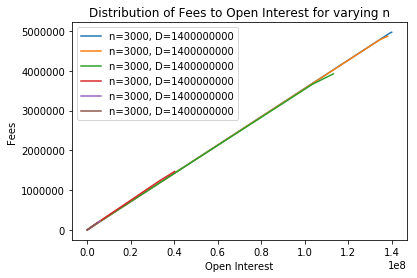

In [36]:
for k,v in results.items():
    n = len(v)
    plt.plot(*zip(*v), label=f"n={n}, D={round(sum(list(zip(*v))[0]))}")
plt.legend()
plt.xlabel("Open Interest")
plt.ylabel("Fees")
plt.title("Distribution of Fees to Open Interest for varying n")
# plt.savefig("./images/fees_distribution_large_n.png")
plt.show() 

Biggest whale share:  0.10003144044187715
Biggest whale share:  0.09871574642504245
Biggest whale share:  0.08085875831692495
Biggest whale share:  0.028677004669175315
Biggest whale share:  0.0041934709423518774
Biggest whale share:  0.003296615904421155


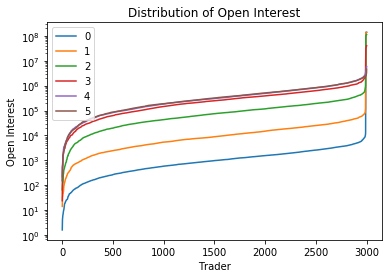

In [37]:
# The amount paid in fees is always the same?
for k, v in results.items():
    f_mkt = np.array([x[1] for x in v])
    d_mkt = np.array([x[0] for x in v])
    plt.plot(sorted(d_mkt), label=k)
    print("Biggest whale share: ", max(d_mkt)/sum(d_mkt))
plt.yscale('log')
plt.legend()
plt.xlabel("Trader")
plt.ylabel("Open Interest")
plt.title("Distribution of Open Interest")
plt.show()

In [44]:
# The amount paid in fees is always the same?
for k, v in results.items():
    f_mkt = np.array([x[1] for x in v])
    d_mkt = np.array([x[0] for x in v])
    print("Sum of fees: ", sum(f_mkt))
    print("Excpected sum of fees: ", (0.7*R*p))

Sum of fees:  49819921.068613365
Excpected sum of fees:  55309582.72
Sum of fees:  50181771.60258273
Excpected sum of fees:  55309582.72
Sum of fees:  52301920.19077905
Excpected sum of fees:  55309582.72
Sum of fees:  54962321.491990164
Excpected sum of fees:  55309582.72
Sum of fees:  55265400.33469488
Excpected sum of fees:  55309582.72
Sum of fees:  55273248.54616243
Excpected sum of fees:  55309582.72


In [38]:

for k,v in results.items():
    

0